In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

In [10]:
img = image.load_img("basedata/train/Real/1.png")

In [19]:
cv2.imread("basedata/train/Real/1.png").shape

(1432, 1150, 3)

In [21]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [31]:
train_dataset = train.flow_from_directory("basedata/train/",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode ='binary')

validation_dataset = train.flow_from_directory("basedata/validation/",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode ='binary')

Found 50 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [27]:
train_dataset.class_indices

{'Fake': 0, 'Real': 1}

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [43]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validation_dataset)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 949ms/step - accuracy: 0.4861 - loss: 4.2548 - val_accuracy: 0.5172 - val_loss: 0.6254
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 744ms/step - accuracy: 0.4000 - loss: 0.8910 - val_accuracy: 0.7241 - val_loss: 0.6317
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step - accuracy: 0.5694 - loss: 0.6642 - val_accuracy: 0.7241 - val_loss: 0.6052
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 720ms/step - accuracy: 0.6667 - loss: 0.5562 - val_accuracy: 0.8621 - val_loss: 0.4062
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - accuracy: 0.6111 - loss: 0.4637 - val_accuracy: 0.4828 - val_loss: 1.3947
Epoch 6/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7500 - loss: 0.6063

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 0.7778 - loss: 0.5916 - val_accuracy: 0.5172 - val_loss: 0.8170
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 697ms/step - accuracy: 0.6944 - loss: 0.6004 - val_accuracy: 0.7931 - val_loss: 0.3701
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - accuracy: 0.8194 - loss: 0.3924 - val_accuracy: 1.0000 - val_loss: 0.3348
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - accuracy: 0.9444 - loss: 0.4264 - val_accuracy: 0.9655 - val_loss: 0.2516
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 713ms/step - accuracy: 1.0000 - loss: 0.3465 - val_accuracy: 0.9655 - val_loss: 0.2115


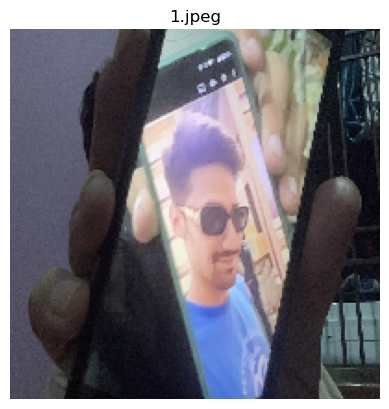

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Real


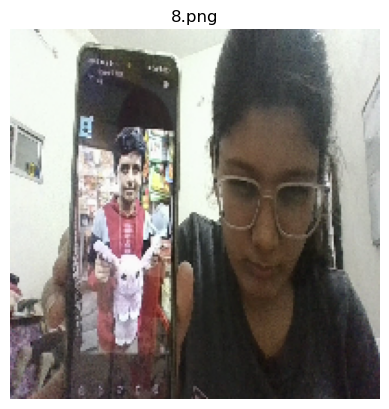

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Fake


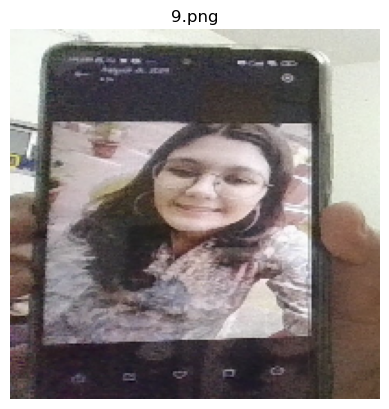

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Real


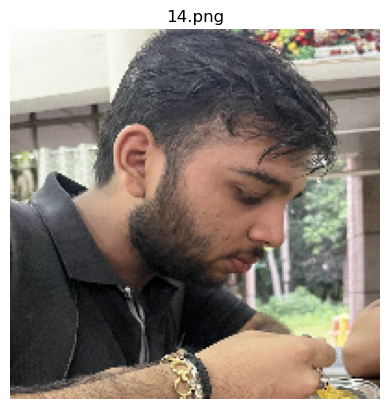

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Real


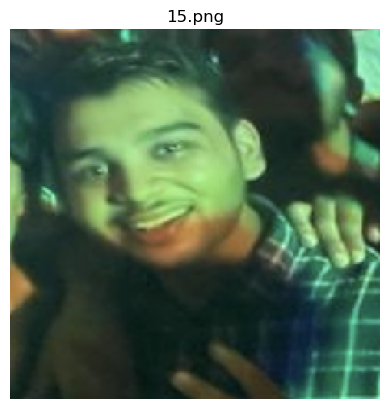

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Real


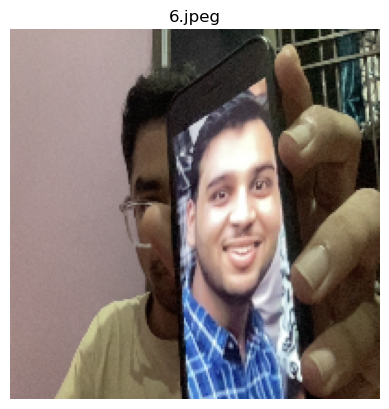

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Fake


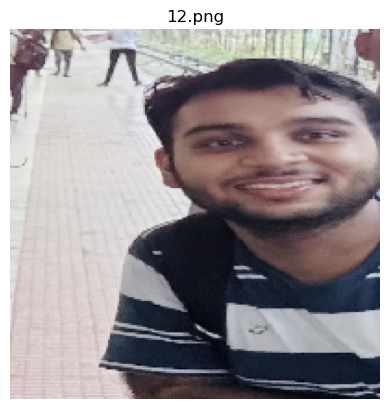

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Real


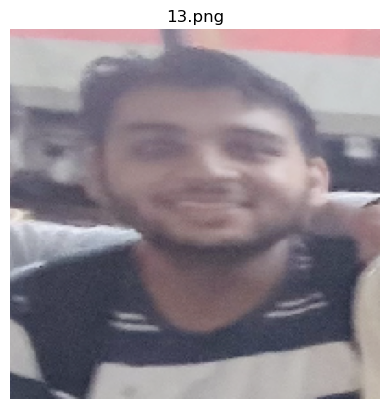

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Real


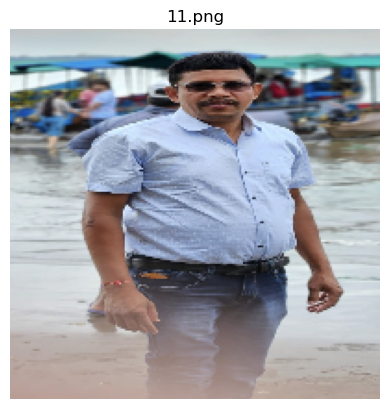

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Real


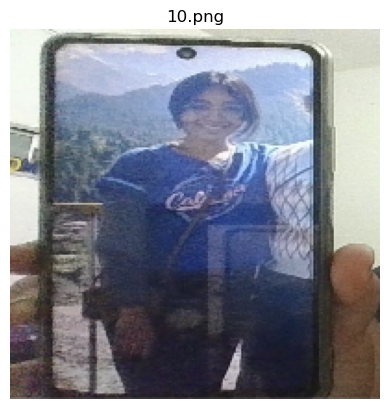

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Real


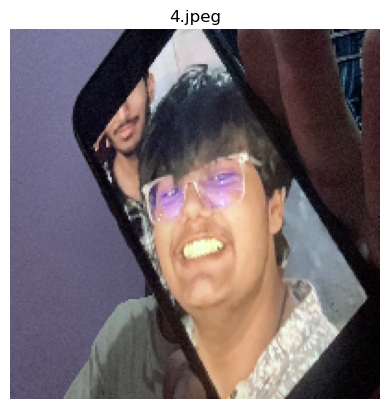

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Real


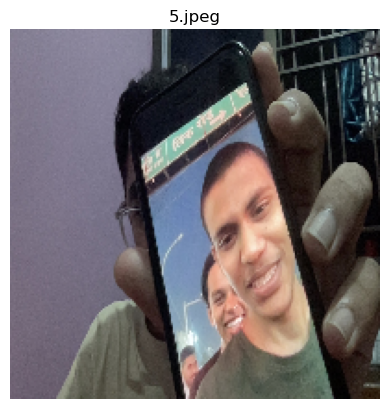

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Fake


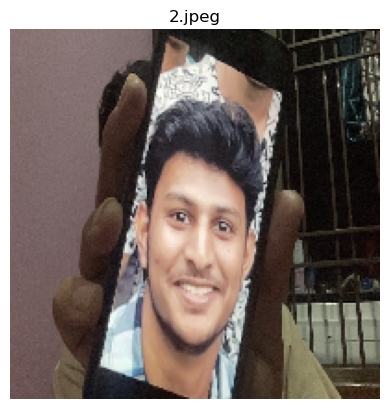

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Fake


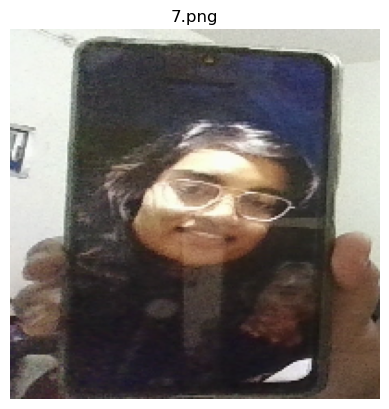

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Real


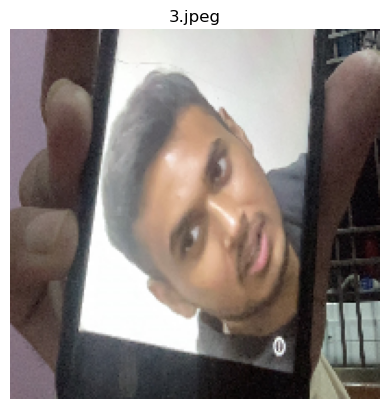

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Fake


In [81]:
import os
from keras.utils import load_img
import matplotlib.pyplot as plt

dir_path = 'basedata/test'
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp') 

for filename in os.listdir(dir_path):
    if filename.lower().endswith(valid_extensions):
        try:
            img_path = os.path.join(dir_path, filename)
            img = load_img(img_path , target_size = (200,200))
            X = image.img_to_array(img)
            X = np.expand_dims(X,axis=0)
            images = np.vstack([X])
            plt.imshow(img)
            plt.title(filename)
            plt.axis('off')
            plt.show()

            val = model.predict(images)
            if val == 0 :
                print("Fake")
            else :
                print("Real")
        except Exception as e:
            print(f"Could not open {filename}: {e}")


In [83]:
model.save("my_model.h5")